In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime, date, timedelta

# statistical analysis
import statsmodels.api as sm
from statsmodels import regression

# plot + styling
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,6)

import yfinance as yfin
yfin.pdr_override()

import matplotlib.pyplot as plt
import seaborn as sns

#from var import VaR

pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [6]:
start_date = datetime(2022, 1, 1)
end_date = datetime.now()
alpha = 0.05
period = '10y'

In [7]:
var_lst = ['^TNX','TLT']

In [8]:
price_df = pdr.get_data_yahoo(var_lst, period=period)['Close']

[*********************100%%**********************]  2 of 2 completed


In [9]:
price_df['^TNX'].mean()

2.271174482657724

# Alpha

In [10]:
def alpha(portfolio_returns, benchmark_returns):
    # mean of the return
    portfolio_avg_return = np.mean(portfolio_returns)
    benchmark_avg_return = np.mean(benchmark_returns)
    
    # volatility
    portfolio_volatility = np.std(portfolio_returns)
    benchmark_volatility = np.std(benchmark_returns)
    
    # our alpha
    alpha = (portfolio_avg_return - benchmark_avg_return) / (portfolio_volatility / benchmark_volatility)
    
    return alpha

In [11]:
asset_name = 'AAPL'
#data = yf.download([asset_name, 'SPY'], start='2010-01-01')['Adj Close']
data = pdr.get_data_yahoo([asset_name,'SPY'], period=period)['Close']

aapl_returns =  data[asset_name].pct_change()
bench_returns = data['SPY'].pct_change()

print(f'alpha of the {asset_name} to benchmark is {alpha(aapl_returns, bench_returns)}')

[*********************100%%**********************]  2 of 2 completed
alpha of the AAPL to benchmark is 0.00039991314613068763


In [22]:
bench_returns

Date
2013-10-07       NaN
2013-10-08   -0.0116
2013-10-09    0.0007
2013-10-10    0.0216
2013-10-11    0.0064
               ...  
2023-10-02   -0.0004
2023-10-03   -0.0134
2023-10-04    0.0073
2023-10-05   -0.0004
2023-10-06    0.0119
Name: SPY, Length: 2518, dtype: float64

# Alpha 2

## Functions

In [12]:
def linreg(x,y):
    x = sm.add_constant(x) # add a column of 1s to our data (for intercept)
    model = regression.linear_model.OLS(y,x).fit()
    x = x[:, 1] # remove the constant
    return model.params[0], model.params[1]

In [13]:
ticker_lst = ['AAPL','SPY']

In [14]:
folio_df = pdr.get_data_yahoo(ticker_lst, period=period)['Close']
folio_df.head()

[*********************100%%**********************]  2 of 2 completed


,AAPL,SPY
Date,,
2013-10-07,17.4196,167.4300
2013-10-08,17.1764,165.4800
2013-10-09,17.3782,165.6000
2013-10-10,17.4871,169.1700
2013-10-11,17.6004,170.2600


In [15]:
return_df = folio_df.pct_change()
return_df = return_df[1:]
return_df.head()

,AAPL,SPY
Date,,
2013-10-08,-0.0140,-0.0116
2013-10-09,0.0117,0.0007
2013-10-10,0.0063,0.0216
2013-10-11,0.0065,0.0064
2013-10-14,0.0066,0.0040


## plot

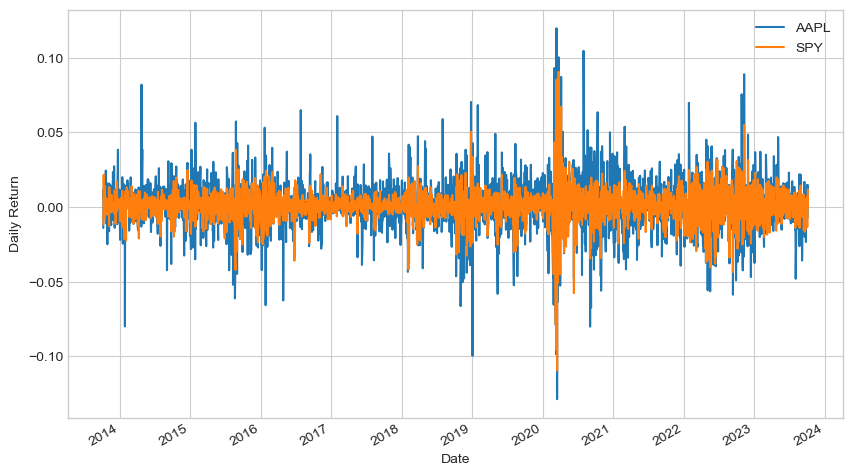

In [16]:
return_df.plot()
plt.ylabel("Daily Return")
plt.legend();

In [17]:
X = return_df['SPY'].values
Y = return_df['AAPL'].values

In [18]:
alpha, beta = linreg(X,Y)
historical_beta = beta

In [19]:
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

alpha: 0.0005614638135422279
beta: 1.1969098169001646


In [20]:
## Plot

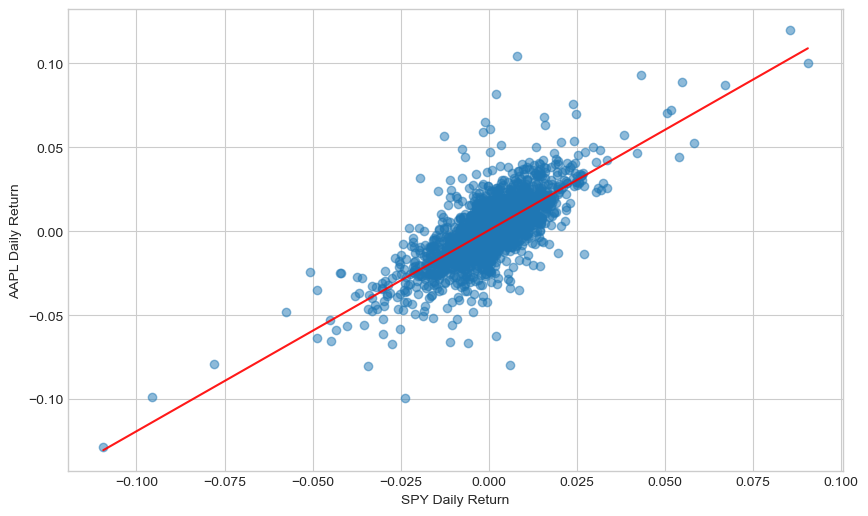

In [21]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha=0.5) # plot returns
plt.xlabel("SPY Daily Return")
plt.ylabel("AAPL Daily Return")

# add regression line (red)
plt.plot(X2, Y_hat, 'r', alpha=0.9);

# Calculate VWAP

In [32]:
asset_name = ['AAPL']
#data = yf.download([asset_name, 'SPY'], start='2010-01-01')['Adj Close']
#data = pdr.get_data_yahoo(asset_name, period=period)['Close']
data = pdr.get_data_yahoo(asset_name, period=period)[['Close','Volume']]
data.columns = ['Price','Volume']
#aapl_returns =  data[asset_name].pct_change()
#bench_returns = data['SPY'].pct_change()
data

[*********************100%%**********************]  1 of 1 completed


,Price,Volume
Date,,
2013-10-07,17.4196,312292400
2013-10-08,17.1764,290917200
2013-10-09,17.3782,301725200
2013-10-10,17.4871,278602800
2013-10-11,17.6004,267738800
...,...,...
2023-10-02,173.7500,52164500
2023-10-03,172.4000,49594600
2023-10-04,173.6600,53020300


In [ ]:
data['price_vol'] = data['Price'] * data['Volume']

In [34]:
# Calculate the cumulative total of price times volume
data['Price_Volume'] = data['Price'] * data['Volume']
data['Cum_Price_Volume'] = data['Price_Volume'].cumsum()

# Calculate the cumulative total of volume
data['Cum_Volume'] = data['Volume'].cumsum()

# Calculate VWAP
data['VWAP'] = data['Cum_Price_Volume'] / data['Cum_Volume']

# Print the VWAP for the last day of trading
last_day_vwap = data.loc[data.index[-1], 'VWAP']
print(f'The VWAP for the last day of trading is: {last_day_vwap:.2f}')

The VWAP for the last day of trading is: 57.55


In [35]:
data

,Price,Volume,Price_Volume,Cum_Price_Volume,Cum_Volume,VWAP
Date,,,,,,
2013-10-07,17.4196,312292400,"5,440,022,245.1859","5,440,022,245.1859",312292400,17.4196
2013-10-08,17.1764,290917200,"4,996,918,848.4406","10,436,941,093.6264",603209600,17.3023
2013-10-09,17.3782,301725200,"5,243,445,059.3239","15,680,386,152.9503",904934800,17.3276
2013-10-10,17.4871,278602800,"4,871,966,882.0137","20,552,353,034.9640",1183537600,17.3652
2013-10-11,17.6004,267738800,"4,712,298,477.6550","25,264,651,512.6190",1451276400,17.4086
...,...,...,...,...,...,...
2023-10-02,173.7500,52164500,"9,063,581,875.0000","20,662,410,898,151.2578",359464759800,57.4810
2023-10-03,172.4000,49594600,"8,550,108,737.2986","20,670,961,006,888.5547",359514354400,57.4969
2023-10-04,173.6600,53020300,"9,207,505,492.1661","20,680,168,512,380.7227",359567374700,57.5140
